### Import the libs

In [2]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt

### Import the data from the csv

In [3]:
data = pd.read_csv("Student_Performance.csv")
data["Extracurricular Activities"] = data["Extracurricular Activities"]=="Yes" # convert yes no to true false
data

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,True,9,1,91.0
1,4,82,False,4,2,65.0
2,8,51,True,7,2,45.0
3,5,52,True,5,2,36.0
4,7,75,False,8,5,66.0
...,...,...,...,...,...,...
9995,1,49,True,4,2,23.0
9996,7,64,True,8,5,58.0
9997,6,83,True,8,5,74.0
9998,9,97,True,7,0,95.0


### Z-Score normalize the data

In [4]:
means = np.mean(data, axis=0)
stds = np.std(data, axis=0)
data_norm = (data - means)/stds
data_norm

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,0.775188,1.704176,1.010455,1.456205,-1.249754,1.862167
1,-0.383481,0.723913,-0.989654,-1.492294,-0.900982,0.508818
2,1.161410,-1.063626,1.010455,0.276805,-0.900982,-0.532220
3,0.002742,-1.005963,1.010455,-0.902594,-0.900982,-1.000687
4,0.775188,0.320275,-0.989654,0.866505,0.145333,0.560870
...,...,...,...,...,...,...
9995,-1.542149,-1.178951,1.010455,-1.492294,-0.900982,-1.677362
9996,0.775188,-0.314013,1.010455,0.866505,0.145333,0.144454
9997,0.388965,0.781575,1.010455,0.866505,0.145333,0.977285
9998,1.547633,1.588851,1.010455,0.276805,-1.598526,2.070374


### Visualize raw training data

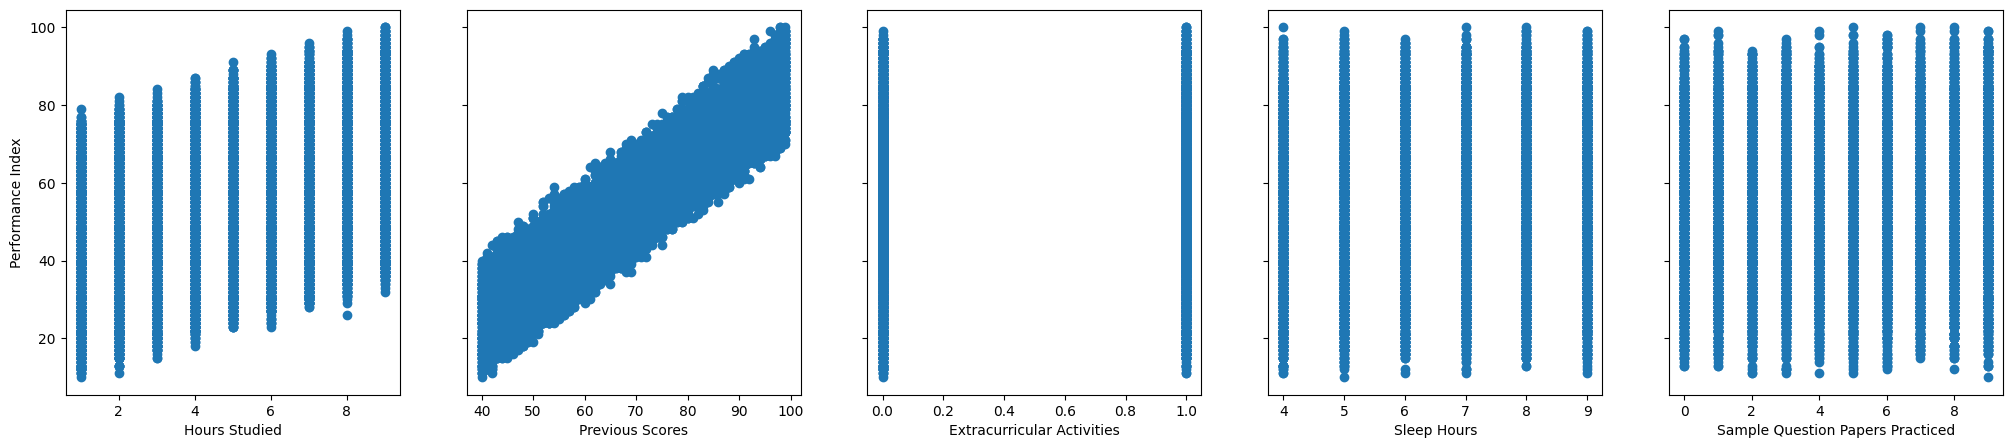

In [5]:
fig,ax=plt.subplots(1, 5, figsize=(25,5), sharey=True)
i = 0
for col in data:
	if col != "Performance Index":
		ax[i].scatter(data[col],data["Performance Index"])
		ax[i].set_xlabel(col)
		i += 1
ax[0].set_ylabel("Performance Index")
plt.show()

### Mark 90% as training data and 10% as test data

In [6]:
total_datapoints = len(data_norm)
training_data = data_norm[:int(0.9*total_datapoints)].drop(columns="Performance Index")
training_target = data_norm[:int(0.9*total_datapoints)]["Performance Index"]
testing_data = data_norm[int(0.9*total_datapoints):].drop(columns="Performance Index")
testing_target = data_norm[int(0.9*total_datapoints):]["Performance Index"]

### Create the gradient descent function

In [ ]:
def gradient_descent(x, y, iters, alpha):
	m,n = x.shape
	w = np.zeros(n)
	b = 0.
	hist = np.empty((0,2))

	for i in range(iters):
		err = (x @ w + b - y)
		dj_dw = (x.T @ err) / m # matrix multiplication magic
		dj_db = np.sum(err) / m

		w = w - alpha * dj_dw
		b = b - alpha * dj_db

		cost = np.sum(err**2) / (2*m)
		hist = np.append(hist, [(i,cost)], axis=0)

		# Print cost every at intervals 10 times or as many iterations if < 10
		if i% math.ceil(iters/10) == 0:
			print(f"Iteration {i:9d}, Cost: {cost:0.5e}")
	return w, b, hist

w, b, hist = gradient_descent(training_data, training_target, 8000, 1.9) # yea even alpha 1.9 

print(f"\nPredicted w's=\n{w}\n, b={b}")

Iteration         0, Cost: 5.02192e-01
Iteration       800, Cost: 5.60424e-03
Iteration      1600, Cost: 5.60424e-03
Iteration      2400, Cost: 5.60424e-03
Iteration      3200, Cost: 5.60424e-03
Iteration      4000, Cost: 5.60424e-03
Iteration      4800, Cost: 5.60424e-03
Iteration      5600, Cost: 5.60424e-03
Iteration      6400, Cost: 5.60424e-03
Iteration      7200, Cost: 5.60424e-03

Predicted w's=
Hours Studied                       0.384635
Previous Scores                     0.919163
Extracurricular Activities          0.016331
Sleep Hours                         0.042169
Sample Question Papers Practiced    0.028782
dtype: float64
, b=-0.000272021442486273


### Even with 200 iterations
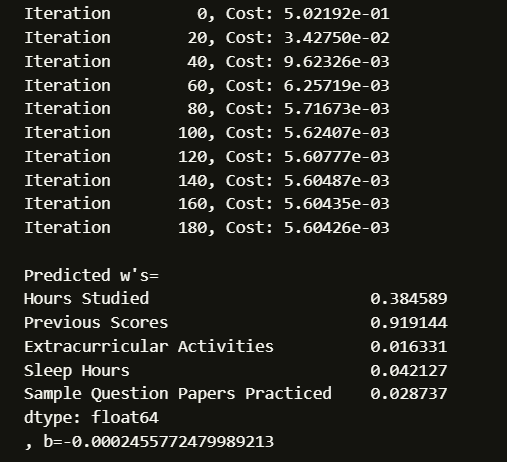

### Visualize Cost vs iteration

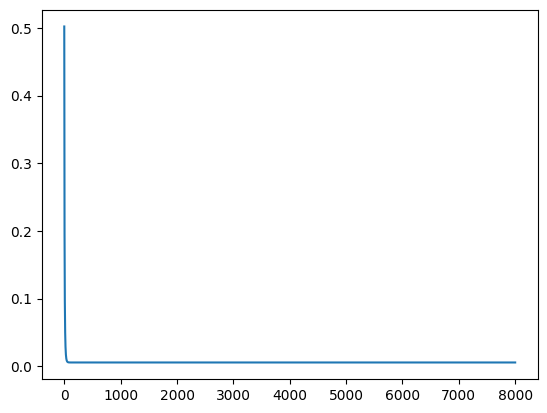

In [7]:
plt.plot(hist[:,0], hist[:,1])

### Targets vs Prediction

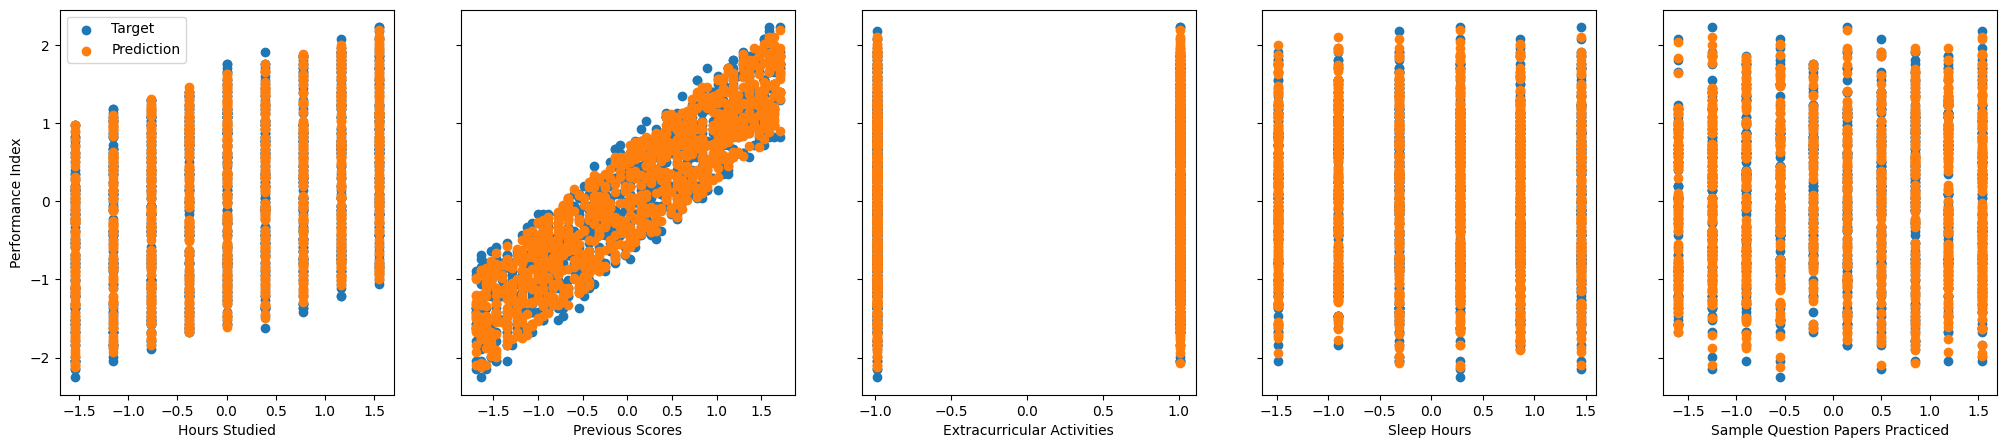

In [8]:
data_pred = np.zeros(total_datapoints)
for i in range(total_datapoints):
	data_pred = testing_data @ w + b

fig,ax=plt.subplots(1, 5, figsize=(25,5), sharey=True)
i = 0
for col in testing_data:
	ax[i].scatter(testing_data[col],testing_target, label="Target")
	ax[i].set_xlabel(col)
	ax[i].scatter(testing_data[col],data_pred, label="Prediction")
	i += 1
ax[0].set_ylabel("Performance Index")
ax[0].legend()
plt.show()

### RSME for the model
(the cost function i have chosen is almost exactly RSME, but just different in factors, so i already minimize RSME directly with gradient discent)

In [13]:
RSME = np.sqrt(hist[-1,1] * 2)
float(RSME)

0.10587013024620379